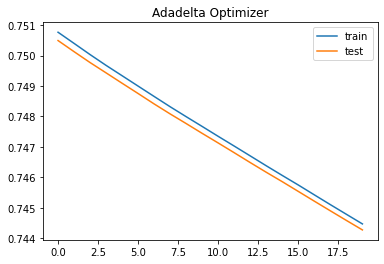


Train Loss                   Train Accuracy
[0.7443054914474487, 0.5008000135421753]
Test Loss                   Test Accuracy
[0.7442694902420044, 0.4912000000476837]


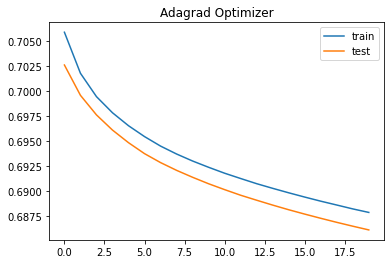


Train Loss                   Train Accuracy
[0.687632143497467, 0.5199999809265137]
Test Loss                   Test Accuracy
[0.6860924363136292, 0.5296000242233276]


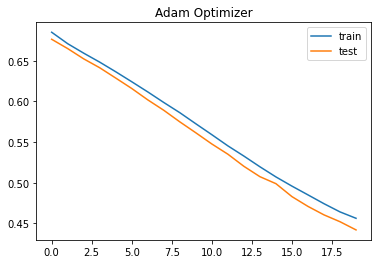


Train Loss                   Train Accuracy
[0.45034945011138916, 0.8381333351135254]
Test Loss                   Test Accuracy
[0.4419328272342682, 0.8503999710083008]


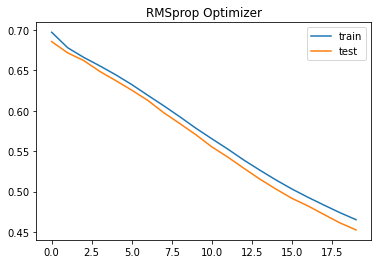


Train Loss                   Train Accuracy
[0.46011173725128174, 0.8362666964530945]
Test Loss                   Test Accuracy
[0.45273223519325256, 0.8392000198364258]


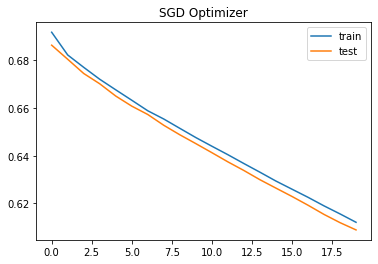


Train Loss                   Train Accuracy
[0.6099885702133179, 0.7837333083152771]
Test Loss                   Test Accuracy
[0.608928382396698, 0.7847999930381775]


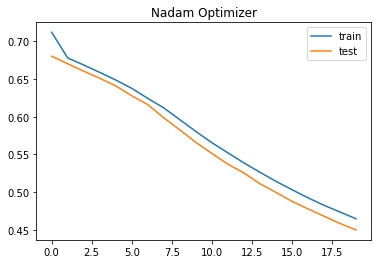


Train Loss                   Train Accuracy
[0.4602111279964447, 0.8399999737739563]
Test Loss                   Test Accuracy
[0.44992733001708984, 0.8511999845504761]


In [ ]:
#Cross entropy loss
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=5000, noise=0.1, random_state=1)
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

def build_model(optimizer):
  #define model
  model = Sequential()
  model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD', 'Nadam']

for i in optimizers:
  model = build_model(i)
  # fit model
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=0)
  #evaluate the model
  train_acc = model.evaluate(X_train, y_train, verbose=0)
  test_acc = model.evaluate(X_test, y_test, verbose=0)
  #plot loss during training
  pyplot.title(i+' Optimizer')
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.legend()
  pyplot.show()
  print()
  print('Train Loss                   Train Accuracy')
  print(train_acc)
  print('Test Loss                   Test Accuracy')
  print(test_acc)